# Spinning Earth due to an Asteroid Impact

ModSim Project 3

Kristtiya Guerra, HK Rho

In [240]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *
import random
import decimal
import math

# First Part - Until Collision

In [241]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter

<Unit('meter')>

In [223]:
# Making a state & system object
x0 = 4.64e8 #m
y0 = 5421106.354806 #m
r0 = 25

# And an inition condition (with everything in SI units)
init = State(
             x = x0, #meters
             y = y0, #meters
             v_x = -25000, # m/s - X Velocity of Asteroid
             v_y = 0, # m/s - Y Velocity of Asteroid
             )


,values
x,4.640000e+08
y,5.421106e+06
v_x,-2.500000e+04
v_y,0.000000e+00


In [224]:
r_asteroid = r0 # m
r_earth = 6.371e6 # m

system = System(init=init,
                G=6.674e-11, # N / kg**2 * m**2    
                m_earth = 5.972e24, # kg
                c_earth = 40.075e6, # m 
                Vol_earth = 1.08320692e21, # m^3
                density_asteroid = 3000, # kg / m^3
                m_asteroid = 50,
                init_w_earth = 7.2921159e-5, # rad/sec
                striking_angle = 45, #degree
                r_final= r_asteroid + r_earth,
                t_0=0, # s
                t_end=10e10 # s
                )

,values
init,x 4.640000e+08 y 5.421106e+06 v_x ...
G,6.674e-11
m_earth,5.972e+24
c_earth,4.0075e+07
Vol_earth,1.08321e+21
density_asteroid,3000
m_asteroid,50
init_w_earth,7.29212e-05
striking_angle,45
r_final,6.37102e+06


In [228]:
def universal_gravitation(init, system):
    """Computes gravitational force between Asteroid and Earth.
    """
    x, y, v_x, v_y = init
    unpack(system)

    r= Vector(-x, -y)
    forceMag = G * m_earth * m_asteroid / (r.mag**2)
    gravity = forceMag   * r.hat()
    
    return gravity


In [229]:
universal_gravitation(init, system)

<Quantity([-0.09254461 -0.00108124], 'dimensionless')>

In [230]:
def slope_func(init, dt, system):
    x, y, v_x, v_y = init
    unpack(system)
    
    gravity = -universal_gravitation(init, system)
    dxdt = v_x
    dydt = v_y
    dvxdt = -gravity[0]/ m_asteroid
    dvydt = 0
    
    return dxdt, dydt, dvxdt, dvydt

In [231]:
slope_func(init, 0, system)

(-25000.0, 0.0, <Quantity(-0.001850892190713955, 'dimensionless')>, 0)

In [235]:
def event_func(init, dt, system):
    x, y, v_x, v_y = init
    r = Vector(x,y)
    
    return r.x - system.r_final # m

In [236]:
event_func(init, 0, system)

<Quantity(457628975.0, 'dimensionless')>

In [239]:
results, details = run_ode_solver(system, slope_func, events=event_func)
details
v_at_collision = get_last_value(results.v_x)

-25512.20749397511

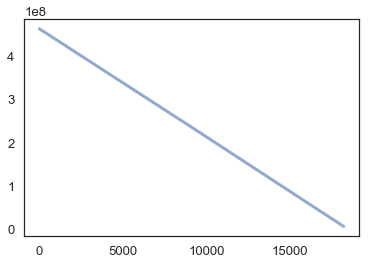

In [238]:
plot(results.x)

# Second Part - Math

In [ ]:
Impact = System(init=init,
                G=6.674e-11, # N / kg**2 * m**2    
                m_earth = 5.972e24, # kg
                c_earth = 40.075e6, # m 
                Vol_earth = 1.08320692e21, # m^3
                density_asteroid = 3000, # kg / m^3
                m_asteroid = 50,
                init_w_earth = 7.2921159e-5, # rad/sec
                striking_angle = 45, #degree
                r_final= r_asteroid + r_earth,
                t_0=0, # s
                t_end=10e10 # s
                )

In [242]:
"""
Function that converts:
Diameter of the asteroid -> Volume of the asteroid
Volume of the asteroid -> Mass of the asteroid
"""

def D_to_mass(D_asteroid, system):
    unpack(system)
    
    volume_asteroid = 4/3 * pi * (D_asteroid/2)**3
    m_asteroid = density_asteroid * volume_asteroid
    
    return m_asteroid

In [65]:
"""
Function that converts:
energy from the asteroid -> angular velocity of the earth
"""

def energy_to_velocity(D_asteroid, system, init):
    r_asteroid = D_asteroid / 2
    unpack(system)
    
    inertia_earth = 2/5 * m_earth * (r_earth**2)
    inertia_both = (2/5 * m_earth * (r_earth**2)) + (2/5 * m_asteroid * (r_asteroid**2))
    
    final_w_earth = sqrt((m_asteroid * (v_at_collision**2)) + (inertia_earth * (init_w_earth**2)) / inertia_both) 
    
    return final_w_earth #rad/sec

In [66]:
def time_for_revolution(w_earth, system):
    unpack(system)
    
    time = c_earth / (w_earth * r_earth)
    
    return time

In [67]:
def event_func_day():
    
    return dist_traveled - 40.075e6 # m

In [68]:
# And an inition condition (with everything in SI units)

dD = 100 # m in diameter
D_asteroid = linrange(100, 5000, dD, endpoint = True) # m in diameter


sweepMass = SweepSeries()

for i in range(len(D_asteroid)):
    sweepMass[D_asteroid[i]] = D_to_mass(D_asteroid, system) #convert this to mass and store it as mass
print(sweepMass[D_asteroid[i]])

[1.57079633e+09 1.25663706e+10 4.24115008e+10 1.00530965e+11
 1.96349541e+11 3.39292007e+11 5.38783140e+11 8.04247719e+11
 1.14511052e+12 1.57079633e+12 2.09072991e+12 2.71433605e+12
 3.45103953e+12 4.31026512e+12 5.30143760e+12 6.43398175e+12
 7.71732235e+12 9.16088418e+12 1.07740920e+13 1.25663706e+13
 1.45471448e+13 1.67258393e+13 1.91118789e+13 2.17146884e+13
 2.45436926e+13 2.76083162e+13 3.09179841e+13 3.44821210e+13
 3.83101516e+13 4.24115008e+13 4.67955934e+13 5.14718540e+13
 5.64497076e+13 6.17385788e+13 6.73478925e+13 7.32870734e+13
 7.95655463e+13 8.61927360e+13 9.31780673e+13 1.00530965e+14
 1.08260854e+14 1.16377158e+14 1.24889304e+14 1.33806714e+14
 1.43138815e+14 1.52895031e+14 1.63084787e+14 1.73717507e+14
 1.84802617e+14 1.96349541e+14]


for i in range(len(sweepMass)):
    state = State(init=,init, new_m_asteroid = sweepMass[i])
    final_w = energy_to_velocity(D_asteroid, system, state)
    
    time_for_revolution(final_w, system)
    print time_for_revolution